In [778]:
import numpy as np
import pandas as pd

companies_df = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt", sep="\t",encoding="palmos")
companies_df['permalink'] = companies_df['permalink'].map(lambda x:x.lower())
len(companies_df['permalink'].unique())

df = companies_df.permalink.map(lambda x:x.lower())
len(df.unique())

companies_df.head()
# companies_df.shape


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [444]:
round_funds_df = pd.read_csv("/Users/priyanka/ML/Investment_Assignment/rounds2.csv", encoding = "palmos")
# round_funds_df.info()
round_funds_df.company_permalink= round_funds_df.company_permalink.map(lambda x:x.lower())
df = round_funds_df.company_permalink.map(lambda x:x.lower())
len(df.unique())
# round_funds_df.head()
# round_funds_df.shape



66368

In [561]:
#Merging data frames companies and rounds

round_funds_df.rename(columns={'company_permalink':'permalink'}, inplace=True)
round_funds_df.head()

#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

master_frame_check=pd.merge(round_funds_df, companies_df, how="outer", on='permalink', indicator= True)
master_frame_check.head()
dfCheck = master_frame_check.groupby('_merge')
dfCheck.count()
# dfCheck.sum()
# master_frame_check.tail()

# #merging the two dataframes
master_frame_merge = pd.merge(round_funds_df,companies_df, how='inner', on='permalink')
len(master_frame.permalink.unique())
master_frame_merge.shape
master_frame_merge.head()
master_frame_merge.loc[(master_frame_merge['raised_amount_usd'] >= 5000000) & (master_frame_merge['raised_amount_usd'] <= 15000000)]
# to check the number of investmentors in the funding type
# master_frame.loc[(master_frame["funding_round_type"] == "venture")].count

ft_alysis = master_frame_merge.groupby("funding_round_type")
ft_alysis.mean()
ft_alysis.count()
# ft_alysis["raised_amount_usd"].mean().sort_values(ascending = False)

# master_frame.head()
master_frame_merge.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [560]:
d1 = master_frame_merge.drop('funding_round_permalink', axis=1)
d2 = d1.drop('funding_round_code', axis=1)
d3 = d2.drop('funded_at', axis=1)
d4 = d3.drop('homepage_url', axis=1)
d5 = d4.drop('state_code', axis=1)
d6 = d5.drop('region', axis=1)
d7= d6.drop('city', axis=1)
d8 = d7.drop('founded_at', axis=1)
master_frame = d8
master_frame.head()





,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN


In [559]:
df = master_frame.loc[(master_frame.funding_round_type == "venture"),:]
df.shape
df.head()
# Country code for Countries with English as their official language
countryCode = [ 'BWA','CMR','ETH','ERI','GMB','GHA','KEN','LSO','LBR','MWI','MUS','NAM','NGA','RWA','SYC','SLE','ZAF','SSD','SDN','SWZ','TZA','UGA','ZMB','ZWE','ATG','BHS','BRB','BLZ','CAN','DMA','GRD','GUY','JAM','KNA','LCA','VCT','TTO','USA','IND','PAK','PHL','SGP','AUS','FJI','KIR','MHL','FSM','NRU','NZL','PLW','PNG','WSM','SLB','TON','TUV','VUT','IRL','MLT','GBR']
# Get rid of other countries
filteredCountries = df.loc[df['country_code'].isin(countryCode), :]
# Check for unique country list to cross verify
# df["country_code"].unique()
# Group based on country code. To get total funding raised in each country
country_alysis = filteredCountries.groupby("country_code")
# Sort based on total funding to get top 9 English countries
sortedCountry = country_alysis['raised_amount_usd'].sum().sort_values(ascending = False)
sortedCountry[0:9]

dfx = df.groupby("country_code")
topNine = dfx['raised_amount_usd'].sum().sort_values(ascending = False)[0:9]
top9 = pd.DataFrame(topNine)
# top9 = top9.reset_index()
top9






Index(['country_code', 'raised_amount_usd'], dtype='object')

In [507]:
# spliting category_list on "|" and creating new column- primary_sector
master_frame['primary_sector'] = master_frame.category_list.str.split('|', expand = True)[0]

# Reading mapping.csv 
# mapping_df = pd.read_csv("/Users/priyanka/ML/Investment_Assignment/mapping.csv", encoding = "palmos")
mapping_df = pd.read_csv("/Users/priyanka/ML/Investment_Assignment/mapping_new.csv", encoding = "palmos")

#imputing corrupted data in mapping.csv
mapping_df['category_list'].replace({'0': 'na'}, inplace=True, regex=True)

# to get unique category-list
len(mapping_df.category_list.unique())
len(master_frame.primary_sector.unique())

# #Converting mapping_df into a series with direct mapping of primary_sector to main_sector
mapping_df = mapping_df.set_index('category_list')
mapping_series = mapping_df.idxmax(axis=1).reset_index()

#converting resulting series to a dataframe 
mapping_sector = pd.DataFrame(mapping_series)

#renaming columns
mapping_sector.columns = ["primary_sector", "main_sector"]

#converting primary sector to lower for both master frame and mapping sector
mapping_sector["primary_sector"] = mapping_sector.primary_sector.apply(lambda x: str(x).lower())
mapping_sector
master_frame["primary_sector"] = master_frame.primary_sector.apply(lambda x: str(x).lower())
master_frame
# merging master_frame and mapping_sector
merged_master = master_frame.merge(mapping_sector, how='inner', on='primary_sector')
merged_master.head()


,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media,Entertainment
1,/organization/90min,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
3,/organization/90min,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/organization/a-b-productions,debt_financing,NaN,A.B Productions,Media|Music|News,operating,USA,media,Entertainment


In [508]:
#The most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).
#####Country1- USA
D1 = merged_master.loc[(merged_master.country_code.isin(["USA"])) & (merged_master.funding_round_type == "venture") & (merged_master.raised_amount_usd >=5000000) &(merged_master.raised_amount_usd <=15000000)]
# Total number of Investments (count)
len(D1)


12149

In [510]:
# Total amount of investment (USD)
D1["raised_amount_usd"].sum()

108521860586.0

In [589]:
# The total number (or count) of investments for each main sector in a separate column
D1_grouped = D1.groupby('main_sector')
totalD1Count = D1_grouped.count()
totalD1Count.sort_values(by="permalink",  ascending = False)
D1Frame = pd.DataFrame()
D1Frame["Total number of investments"] = totalD1Count["permalink"]
D1Frame["country_code"] = "USA"

# The total amount invested in each main sector in a separate column
D1Frame["Total amount invested in each Sector"] = D1_grouped["raised_amount_usd"].sum().sort_values(ascending = False)
top3D1 = D1Frame.sort_values(by='Total number of investments', ascending = False)[0:3]
top3D1


,Total number of investments,country_code,Total amount invested in each Sector
main_sector,,,
Others,2950,USA,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,USA,2.380738e+10
Cleantech / Semiconductors,2350,USA,2.163343e+10


In [544]:
# For point 3 (top sector count-wise), which company received the highest investment?
# TopCompany1D1 = D1.loc[(D1.main_sector == "Others")]
# TopCompany1D1.sort_values(by='raised_amount_usd', ascending = False).head()
topCompanyD1 = D1.groupby(['main_sector','name'])
topCompanyD1.raised_amount_usd.sum().sort_values(ascending = False)[0:10]



main_sector                              name                           
News, Search and Messaging               Airspan Networks                   81769000.0
Cleantech / Semiconductors               Biodesix                           75300000.0
Entertainment                            Avnera                             71062970.0
Cleantech / Semiconductors               Tigo Energy                        68739496.0
Social, Finance, Analytics, Advertising  SST Inc. (Formerly ShotSpotter)    67933006.0
Health                                   EndoGastric Solutions              67896724.0
Others                                   Virtustream                        64300000.0
Social, Finance, Analytics, Advertising  Demandbase                         63000000.0
                                         Intacct                            61800000.0
Cleantech / Semiconductors               ForSight Labs                      61300001.0
Name: raised_amount_usd, dtype: float64

In [583]:
# ##### Country2- UK -GBR
D2 = merged_master.loc[(merged_master.country_code.isin(["GBR"])) & (merged_master.funding_round_type == "venture") & (merged_master.raised_amount_usd >=5000000) &(merged_master.raised_amount_usd <=15000000)]
# Total number of Investments (count)
len(D2)

628

In [515]:
# # Total amount of investment (USD)
D2["raised_amount_usd"].sum()

5436843539.0

In [587]:
# The total number (or count) of investments for each main sector in a separate column
D2_grouped = D2.groupby('main_sector')
totalD2Count = D2_grouped.count()
totalD2Count.sort_values(by="permalink",  ascending = False)
D2Frame = pd.DataFrame()
D2Frame["Total number of investments"] = totalD2Count["permalink"]
D2Frame["country_code"] = "GBR"
# The total amount invested in each main sector in a separate column
D2Frame["Total amount invested in each Sector"] = D2_grouped["raised_amount_usd"].sum().sort_values(ascending = False)
top3D2 = D2Frame.sort_values(by='Total number of investments', ascending = False)[0:3]
top3D2



,Total number of investments,country_code,Total amount invested in each Sector
main_sector,,,
Others,147,GBR,1.283624e+09
"Social, Finance, Analytics, Advertising",133,GBR,1.089404e+09
Cleantech / Semiconductors,130,GBR,1.163990e+09


In [547]:
# For point 3 (top sector count-wise), which company received the highest investment?
D2 = merged_master.loc[(merged_master.country_code.isin(["GBR"])) & (merged_master.funding_round_type == "venture") & (merged_master.raised_amount_usd >=5000000) &(merged_master.raised_amount_usd <=15000000)]

topCompanyD2 = D2.groupby(['main_sector','name'])
topCompanyD2.raised_amount_usd.sum().sort_values(ascending = False)[0:10]



main_sector                              name                  
Automotive & Sports                      GreenRoad Technologies    52500000.0
Social, Finance, Analytics, Advertising  Celltick Technologies     37500000.0
News, Search and Messaging               Ubiquisys                 37000000.0
Others                                   Electric Cloud            37000000.0
                                         SenSage                   36250000.0
News, Search and Messaging               brylle                    36000000.0
Cleantech / Semiconductors               EUSA Pharma               35600000.0
Automotive & Sports                      Autoquake                 35557140.0
Social, Finance, Analytics, Advertising  myThings                  34000000.0
                                         Zopa                      32900000.0
Name: raised_amount_usd, dtype: float64

In [519]:
# # Country3- INDIA- IND
D3 = merged_master.loc[(merged_master.country_code.isin(["IND"])) & (merged_master.funding_round_type == "venture") & (merged_master.raised_amount_usd >=5000000) &(merged_master.raised_amount_usd <=15000000)]
# Total number of Investments (count)
len(D3)

330

In [523]:
# Total amount of investment (USD)
D3["raised_amount_usd"].sum()
D3.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media,Entertainment
975,/organization/chillr-2,venture,6000000.0,Chillr,Apps|Banking|Mobile Payments,operating,IND,apps,"News, Search and Messaging"
1574,/organization/jugnoo,venture,5000000.0,JUGNOO,Apps|Social Business|Software,operating,IND,apps,"News, Search and Messaging"
2053,/organization/peppertap,venture,10000000.0,PepperTap,Apps|Groceries|Online Shopping,operating,IND,apps,"News, Search and Messaging"
2671,/organization/tinyowl-technology,venture,7665775.0,TinyOwl Technology,Apps|Mobile|Specialty Foods,operating,IND,apps,"News, Search and Messaging"


In [590]:
# The total number (or count) of investments for each main sector in a separate column
D3_grouped = D3.groupby('main_sector')
totalD3Count = D3_grouped.count()
totalD3Count.sort_values(by="permalink",  ascending = False)
D3Frame = pd.DataFrame()
D3Frame["Total number of investments"] = totalD3Count["permalink"]
D3Frame["country_code"] = "IND"

# The total amount invested in each main sector in a separate column
D3Frame["Total amount invested in each Sector"] = D3_grouped["raised_amount_usd"].sum().sort_values(ascending = False)
top3D3 = D3Frame.sort_values(by='Total number of investments', ascending = False)[0:3]


top3D3



,Total number of investments,country_code,Total amount invested in each Sector
main_sector,,,
Others,110,IND,1.013410e+09
"Social, Finance, Analytics, Advertising",60,IND,5.505496e+08
"News, Search and Messaging",52,IND,4.338345e+08


In [549]:
# For point 3 (top sector count-wise), which company received the highest investment?
topCompanyD3 = D3.groupby(['main_sector','name'])
topCompanyD3.raised_amount_usd.sum().sort_values(ascending = False)[0:10]


main_sector                              name              
Social, Finance, Analytics, Advertising  Manthan Systems       50700000.0
Cleantech / Semiconductors               Azure Power           47200000.0
Others                                   FirstCry.com          39000000.0
                                         Myntra                38000000.0
News, Search and Messaging               GupShup               33000000.0
Others                                   CommonFloor           32900000.0
Cleantech / Semiconductors               Perfint Healthcare    29200000.0
Automotive & Sports                      MakeMyTrip.com        28000000.0
Social, Finance, Analytics, Advertising  Komli Media           28000000.0
Others                                   Pepperfry.com         28000000.0
Name: raised_amount_usd, dtype: float64

Text(0.5,1,'Countries vs Total Amount of Investments')

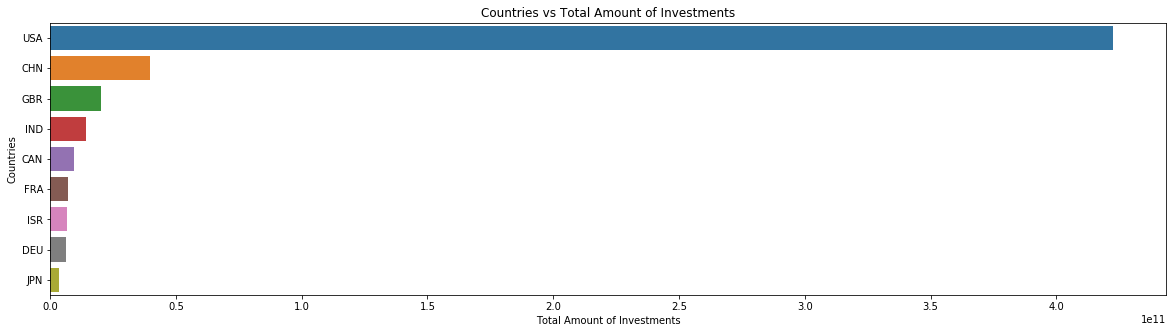

In [572]:
#Plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))

sns.barplot(y="country_code", x="raised_amount_usd", data=top9)
plt.xlabel("Total Amount of Investments")
plt.ylabel("Countries")
plt.title("Countries vs Total Amount of Investments")

Text(0.5,1,'Total Number of Investments for Top3 countries in Top3 Sectors ')

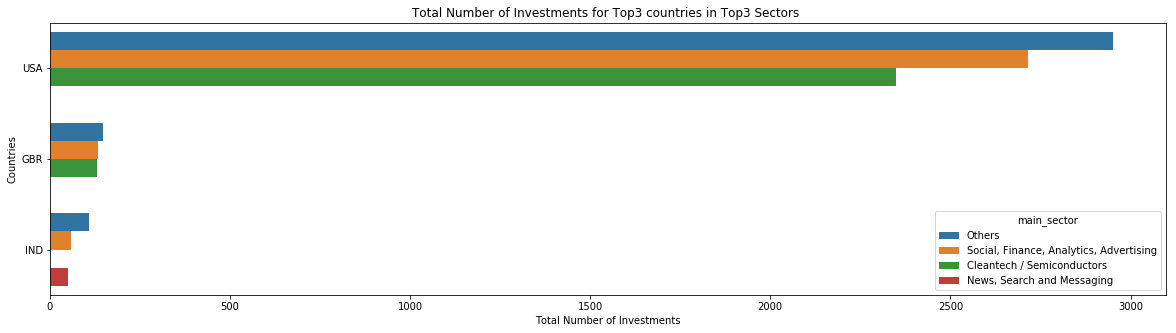

In [605]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')

finaldf = pd.concat([top3D1,top3D2,top3D3])
finaldf = finaldf.reset_index()

sns.barplot(y="country_code", x="Total number of investments", hue="main_sector", data=finaldf)
plt.xlabel("Total Number of Investments")
plt.ylabel("Countries")
plt.title("Total Number of Investments for Top3 countries in Top3 Sectors ")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


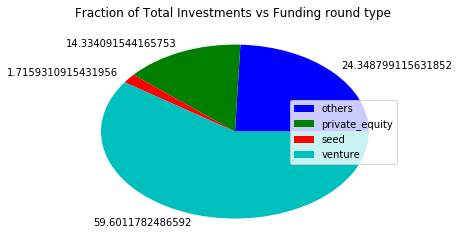

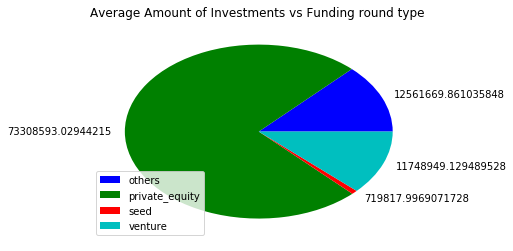

In [777]:
fundingTypeFrame = round_funds_df.loc[(round_funds_df.funding_round_type.isin([ "seed","venture","private_equity"])),:]

fundingTypeRemaining = round_funds_df.loc[~(round_funds_df.funding_round_type.isin([ "seed","venture","private_equity"])),:]
fundingTypeRemaining["funding_round_type"] = "others"
finaldf = pd.concat([fundingTypeFrame, fundingTypeRemaining])

fundingTypeGroup = finaldf.groupby("funding_round_type")

fractionInvestment = pd.DataFrame()
fractionInvestment["Fraction of Total Investments"] = (fundingTypeGroup["raised_amount_usd"].sum()/round_funds_df["raised_amount_usd"].sum() )*100
fractionInvestment["Average Amount of Investments"] = fundingTypeGroup["raised_amount_usd"].mean()
fractionInvestment = fractionInvestment.reset_index()
fractionInvestment




import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show

# plt.figure(figsize=(10,10))
plt.close('all')

# Create first subplot 
colors = ['b', 'g', 'r', 'c']

plt.subplot(211)
ax1 = plt.axes(frameon=False)
ax1.set_frame_on(False)

labels1 = fractionInvestment["funding_round_type"]
plt.pie(fractionInvestment["Fraction of Total Investments"], colors=colors, labels=fractionInvestment["Fraction of Total Investments"], counterclock=True, shadow=False)
plt.title('Fraction of Total Investments vs Funding round type ')

plt.legend(labels1,loc=5)
plt.show()

# create the second subplot 
plt.subplot(212)

ax2 = plt.axes(frameon=False)
ax2.set_frame_on(False)
labels2 = fractionInvestment["funding_round_type"]
plt.pie(fractionInvestment["Average Amount of Investments"], colors=colors, labels=fractionInvestment["Average Amount of Investments"], counterclock=True, shadow=False)
plt.title('Average Amount of Investments vs Funding round type ')
plt.legend(labels2,loc=3)
plt.show()
# plt.plot(x, y)